In [1]:
import os
import pandas as pd
os.chdir(r'C:\Users\신상훈\Desktop\preprocessing\part-1.-데이터-핸들링\1. 데이터 핸들링\데이터')

In [2]:
sheet_name = [str(i+1) + '월' for i in range(12)]
sheet_name

['1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월', '12월']

In [4]:
merged_df = pd.DataFrame()
for sn in sheet_name:
    df = pd.read_excel('월별매출데이터.xlsx', sheet_name = sn, skiprows = range(6)).iloc[:,1:]
    merged_df = pd.concat([merged_df,df], axis = 0, ignore_index = True)

In [5]:
merged_df.head()

,일자,지점,품명,수량,주문인 ID,수령 주소,주문 상태,결제 수단
0,2018.1.1,지점1,제품B,3,C-168,서울특별시 동작구 흑석동,주문완료,인터넷뱅킹
1,2018.1.1,지점2,제품F,8,C-87,서울특별시 서대문구 신촌동,배송완료,신용카드
2,2018.1.1,지점4,제품B,2,C-158,서울특별시 종로구 종로5가,배송완료,휴대폰결제
3,2018.1.1,지점3,제품D,7,C-307,서울특별시 서대문구 냉천동,주문완료,휴대폰결제
4,2018.1.1,지점2,제품E,9,C-342,서울특별시 종로구 묘동,배송완료,인터넷뱅킹


In [6]:
# str.replace를 사용하여 '.'을 '-'로 변경
# 문자열 검색
merged_df['일자'] = merged_df['일자'].str.replace('.','-')
merged_df['일자']

0          2018-1-1
1          2018-1-1
2          2018-1-1
3          2018-1-1
4          2018-1-1
            ...    
18224    2018-12-31
18225    2018-12-31
18226    2018-12-31
18227    2018-12-31
18228    2018-12-31
Name: 일자, Length: 18229, dtype: object

In [7]:
price_df = pd.read_excel('제품별_가격정보.xlsx')
price_df

,제품,제품A,제품B,제품C,제품D,제품E,제품F
0,가격,20000,5000,10000,8000,30000,15000


In [8]:
price_df = price_df.T
price_df

,0
제품,가격
제품A,20000
제품B,5000
제품C,10000
제품D,8000
제품E,30000
제품F,15000


In [11]:
price_df.loc['제품A':'제품F', 0] # 새로운 데이터프레임의 컬럼명이 0임

제품A    20000
제품B     5000
제품C    10000
제품D     8000
제품E    30000
제품F    15000
Name: 0, dtype: object

In [15]:
price_dict = price_df.loc['제품A':'제품F',0].to_dict()
price_dict

{'제품A': 20000,
 '제품B': 5000,
 '제품C': 10000,
 '제품D': 8000,
 '제품E': 30000,
 '제품F': 15000}

In [17]:
merged_df['품명'].head()

0    제품B
1    제품F
2    제품B
3    제품D
4    제품E
Name: 품명, dtype: object

In [18]:
merged_df['가격'] = merged_df['품명'].replace(price_dict)

In [19]:
merged_df['가격']

0         5000
1        15000
2         5000
3         8000
4        30000
         ...  
18224    15000
18225     8000
18226     8000
18227     5000
18228     8000
Name: 가격, Length: 18229, dtype: int64

In [20]:
merged_df['주문 금액'] = merged_df['수량'] * merged_df['가격'] * 1.1 

In [21]:
merged_df.head()

,일자,지점,품명,수량,주문인 ID,수령 주소,주문 상태,결제 수단,가격,주문 금액
0,2018-1-1,지점1,제품B,3,C-168,서울특별시 동작구 흑석동,주문완료,인터넷뱅킹,5000,16500.0
1,2018-1-1,지점2,제품F,8,C-87,서울특별시 서대문구 신촌동,배송완료,신용카드,15000,132000.0
2,2018-1-1,지점4,제품B,2,C-158,서울특별시 종로구 종로5가,배송완료,휴대폰결제,5000,11000.0
3,2018-1-1,지점3,제품D,7,C-307,서울특별시 서대문구 냉천동,주문완료,휴대폰결제,8000,61600.0
4,2018-1-1,지점2,제품E,9,C-342,서울특별시 종로구 묘동,배송완료,인터넷뱅킹,30000,297000.0


In [22]:
merged_df['월'] = merged_df['일자'].str.split('-',expand = True).iloc[:,1].astype(int)
merged_df['월']

0         1
1         1
2         1
3         1
4         1
         ..
18224    12
18225    12
18226    12
18227    12
18228    12
Name: 월, Length: 18229, dtype: int32

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 20
plt.rcParams["figure.figsize"] = (8, 10)

In [24]:
# 월과 품목에 따른 주문 금액 합계 계산
grouped_df_by_month = merged_df.groupby('월',as_index = False)['주문 금액'].sum()
grouped_df_by_month_and_product = merged_df.groupby(['월','품명'], as_index = False)['주문 금액'].sum()

In [25]:
grouped_df_by_month.head()

,월,주문 금액
0,1,114211900.0
1,2,104314100.0
2,3,111015300.0
3,4,122255100.0
4,5,110561000.0


In [26]:
grouped_df_by_month_and_product.head()

,월,품명,주문 금액
0,1,제품A,7392000.0
1,1,제품B,8283000.0
2,1,제품C,18722000.0
3,1,제품D,23170400.0
4,1,제품E,32010000.0


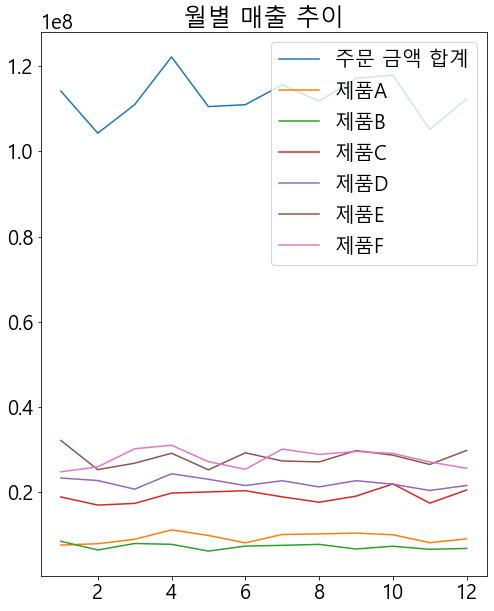

In [27]:
plt.title('월별 매출 추이')
plt.plot(grouped_df_by_month['월'],grouped_df_by_month['주문 금액'],
        label = '주문 금액 합계')
for product in grouped_df_by_month_and_product['품명'].unique():
    plt.plot(grouped_df_by_month_and_product['월'].unique(),
            grouped_df_by_month_and_product.loc[grouped_df_by_month_and_product['품명'] == product]['주문 금액'], # 마스킹 검색            
             label = product)
    
plt.legend(loc = 'upper right')